In [30]:
import numpy as np

#ith open('befkbhalderstatkode.csv') as open_file:
data = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

In [31]:
mask = (data[:,0] == 2015)
data2 = data[mask]

areas = {}
for d in data2:
    areas[d[1]] = areas.get(d[1], 0) + d[4]

print(areas)

{1: 51937, 2: 75113, 3: 78802, 4: 61623, 5: 51727, 6: 39537, 7: 43908, 8: 53604, 9: 55205, 10: 64967, 99: 3872}


<BarContainer object of 11 artists>

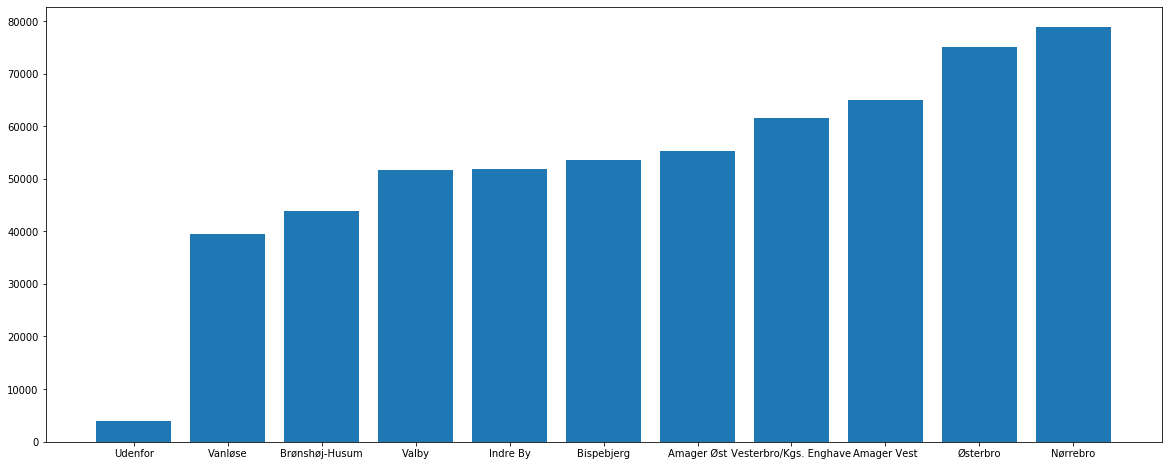

In [32]:
import matplotlib.pyplot as plt

areas = {k: v for k, v in sorted(areas.items(), key=lambda item: item[1])}

x_bar = areas.values()
y_bar = [neighb[x] for x in areas.keys()]


plt.figure(figsize=(20,8))
plt.bar(y_bar, x_bar)

In [35]:
mask = (data[:,0] ==2015) & (data[:,2] > 65)

print(np.sum(data[mask & (data[:,1] < 99)][:,4]))
print(np.sum(data[mask & (data[:,1] == 99)][:,4]))

55700
50


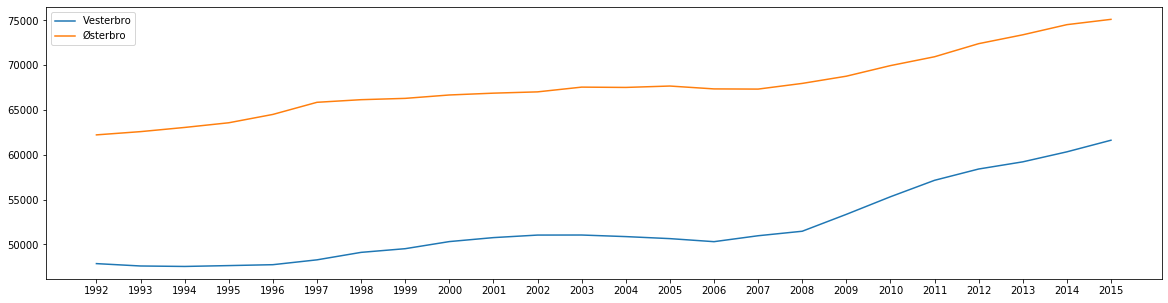

In [44]:
def number_of_people_pr_year(year, mask):
    people_in_year = data[mask & (data[:,0] == year)]
    return np.sum(people_in_year[:,4])

maskvest = (data[:,0] >= 1992) & (data[:,0] <=2015) & (data[:,1] ==4)
maskoest = (data[:,0] >= 1992) & (data[:,0] <=2015) & (data[:,1] ==2)

y_bar = list(set(data[maskvest][:,0]))
x_bar = np.array([number_of_people_pr_year(n, maskvest) for n in y_bar])
x_bar2 = np.array([number_of_people_pr_year(n, maskoest) for n in y_bar])

plt.figure(figsize=(20,5))
plt.plot(y_bar, x_bar, label='Vesterbro')
plt.plot(y_bar, x_bar2, label='Østerbro')

plt.xticks(y_bar)

plt.legend()